In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Background to Irish Weather Buoy Network data

For this analysis I going to use data from Irish weather buoy network data [[1](https://erddap.marine.ie/erddap/tabledap/IWBNetwork.html)] 
Here I read in dataset and have a peak at the data to see which columns to simulate for the study

In [35]:
waveBuoyReal = pd.read_csv('IWBNetwork_d7a0_c1fd_81c3.csv')

waveBuoyReal.head()

,station_id,CallSign,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,...,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp,QC_Flag
0,NaN,NaN,degrees_east,degrees_north,UTC,mb,degrees_true,kn,kn,m,...,m,degree_C,degree_C,degree_C,PSU,percent,degrees,degrees_true,s,NaN
1,M2,62091.0,-5.4302,53.4836,2019-11-30T00:00:00Z,1019.482,140.0,11.385,15.654,0.586,...,0.703,8.75,NaN,12.441,NaN,64.844,32.344,156.094,2.813,0.0
2,M3,62092.0,-10.548261,51.215956,2019-11-30T00:00:00Z,1007.324,110.0,24.477,33.3,2.344,...,3.281,10.898,NaN,10.859,NaN,87.891,28.125,116.719,5.742,0.0
3,M4,62093.0,-9.999136,54.999967,2019-11-30T00:00:00Z,1017.48,117.0,18.073,22.343,1.758,...,2.109,7.871,NaN,10.781,NaN,NaN,61.875,357.188,9.609,0.0
4,M5,62094.0,-6.704336,51.690425,2019-11-30T00:00:00Z,1015.125,121.0,21.062,26.754,1.563,...,1.875,10.654,NaN,11.865,NaN,85.547,36.563,105.469,5.508,0.0


The head method above shown me that the first rows would not be used for inital analysis for the dataset as these are units. These must be removed 

In [38]:
waveBuoyRealDataSet = waveBuoyReal.iloc[1:]
waveBuoyRealDataSet.head()

,station_id,CallSign,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,...,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp,QC_Flag
1,M2,62091.0,-5.4302,53.4836,2019-11-30T00:00:00Z,1019.482,140.0,11.385,15.654,0.586,...,0.703,8.75,NaN,12.441,NaN,64.844,32.344,156.094,2.813,0.0
2,M3,62092.0,-10.548261,51.215956,2019-11-30T00:00:00Z,1007.324,110.0,24.477,33.3,2.344,...,3.281,10.898,NaN,10.859,NaN,87.891,28.125,116.719,5.742,0.0
3,M4,62093.0,-9.999136,54.999967,2019-11-30T00:00:00Z,1017.48,117.0,18.073,22.343,1.758,...,2.109,7.871,NaN,10.781,NaN,NaN,61.875,357.188,9.609,0.0
4,M5,62094.0,-6.704336,51.690425,2019-11-30T00:00:00Z,1015.125,121.0,21.062,26.754,1.563,...,1.875,10.654,NaN,11.865,NaN,85.547,36.563,105.469,5.508,0.0
5,M6,62095.0,-15.88135,53.07482,2019-11-30T00:00:00Z,1006.978,112.0,19.809,29.145,3.359,...,4.531,10.752,NaN,11.758,NaN,91.113,67.148,143.438,6.797,0.0


### Display distributions for fields of interst to wave height

The fields I use are the following  may discount some as there may be not relationship in the investigation
- station_id String 
- time Datetime
- AtmosphericPressure number
- WindDirection String 
- WindSpeed number
- Gust number 
- WaveHeight number 
- Hmax(Maximum Wave Height) number 
- AirTemperature number
- SeaTemperature number 
- RelativeHumidity number 


I am going to create a histrogram for each field so I can see what distributin if any field is in . First thing I might have to change values for columns are pandas often read in data as generic object types 

In [39]:
realwaveBuoyDataSet = waveBuoyRealDataSet[['station_id','time','AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','Hmax','AirTemperature','SeaTemperature','RelativeHumidity']]
realwaveBuoyDataSet.dtypes

station_id             object
time                   object
AtmosphericPressure    object
WindDirection          object
WindSpeed              object
Gust                   object
WaveHeight             object
WavePeriod             object
Hmax                   object
AirTemperature         object
SeaTemperature         object
RelativeHumidity       object
dtype: object

From above shows that I must change all data types to whatever type they should be 
### Numeric fields 


In [63]:
realwaveBuoyDataSet.iloc[:,0]= realwaveBuoyDataSet.iloc[:,0].astype(str)
realwaveBuoyDataSet.iloc[:,1] = pd.to_datetime(realwaveBuoyDataSet.iloc[:,1],errors='ignore')
realwaveBuoyDataSet.iloc[:,2] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,2],errors='ignore')
realwaveBuoyDataSet.iloc[:,3] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,3],errors='ignore')
realwaveBuoyDataSet.iloc[:,4] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,4],errors='ignore')
realwaveBuoyDataSet.iloc[:,5] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,5],errors='ignore')
realwaveBuoyDataSet.iloc[:,6] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,6],errors='ignore')
realwaveBuoyDataSet.iloc[:,7] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,7],errors='ignore')
realwaveBuoyDataSet.iloc[:,8] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,8],errors='ignore')
realwaveBuoyDataSet.iloc[:,9] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,9],errors='ignore')
realwaveBuoyDataSet.iloc[:,10] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,10],errors='ignore')
realwaveBuoyDataSet.iloc[:,11] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,11],errors='ignore')
realwaveBuoyDataSet.dtypes

station_id                          object
time                   datetime64[ns, UTC]
AtmosphericPressure                float64
WindDirection                      float64
WindSpeed                          float64
Gust                               float64
WaveHeight                         float64
WavePeriod                         float64
Hmax                               float64
AirTemperature                     float64
SeaTemperature                     float64
RelativeHumidity                   float64
dtype: object

#### Histrogram of Atmoseric pressure 

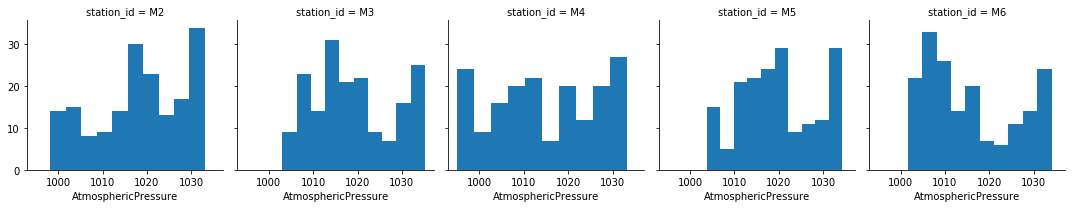

In [70]:

g = sns.FacetGrid(realwaveBuoyDataSet , col="station_id")
g = g.map(plt.hist, "AtmosphericPressure")
g

In [ ]:
Histrogram of Wind speed 
col
​
g = sns.FacetGrid(realwaveBuoyDataSet , col="station_id")
g = g.map(plt.hist, "AtmosphericPressure")
g

### Field experience

.From [[1](https://issuu.com/lastudio/docs/14752_tnadt_63_issuu)] 70% of those in the survey had been paddling  5 or more years , with nearly half of them having 10 or more experience .  Therefore I generated a data set as below.
35% - five or more experience
35% - ten or more experince 
30% less than five years experience 

In [2]:
experienced = []
for i in range(35):
    experienced.append(np.random.randint(6))
for i in range(35):
    experienced.append(np.random.randint(11))
for i in range(30):
    experienced.append(np.random.randint(20))  
np.random.shuffle(experienced)

Years_Of_Experience = pd.Series(experienced)
Years_Of_Experience

0     3
1     3
2     5
3     6
4     3
     ..
95    7
96    1
97    7
98    1
99    6
Length: 100, dtype: int64

### Field Location



There was no information on location other than most incdients happened on the west coast. Thus therefore I split the 4 regions equally. 
%25 - west coast 
%25 east Coast
%25 South Coast
%25 North Coast



In [3]:

location = []
for i in range(25):
    location.append(0)
for i in range(25):
    location.append(1)
for i in range(25):
    location.append(2)
for i in range(25):
    location.append(3)    
np.random.shuffle(location)

for i in range(len(location)):
    if location[i] == 0:
        location[i] = "West Coast"
    elif location  == 1:
        location[i] = "East Coast"
    elif location  == 2:
        location[i] = "North Coast"
    else:
        location[i] = "South Coast"
location_of_incident = pd.Series(location)
location_of_incident

0      West Coast
1      West Coast
2     South Coast
3     South Coast
4      West Coast
         ...     
95     West Coast
96    South Coast
97    South Coast
98    South Coast
99     West Coast
Length: 100, dtype: object

### Field Wind Speed 

In [4]:
windSpeed = []
# 3rd of incidents happend in force 3 between 12km/h and 20 km/h
for i in range(33):
    windSpeed.append(np.random.randint(12,20))
#  80% of incidents happend in force 4 and under 
for i in range(47):
    windSpeed.append(np.random.randint(0,29))
# 20% of incidents happened above force 4 
for i in range(20):
    windSpeed.append(np.random.randint(29,40))  
np.random.shuffle(windSpeed)
Wind_Speed = pd.Series(windSpeed)
Wind_Speed

0     14
1     17
2     20
3     18
4     14
      ..
95    27
96    13
97     6
98    39
99    13
Length: 100, dtype: int64

### Group Size 

In [5]:
groupSize = []
# Most incidents occured when group size was between 7 and 8 people
for i in range(60):
    groupSize.append(np.random.randint(7,9))
#  Followed by between 3 and 4 people
for i in range(30):
    groupSize.append(np.random.randint(3,5))
# Only 4 incidents 1 person was in the paddle
for i in range(4):
    groupSize.append(1)
# All other size groups
groupSize.append(2)
groupSize.append(5)
groupSize.append(6)
groupSize.append(12)
groupSize.append(9)
groupSize.append(10)



np.random.shuffle(groupSize)
group_Size = pd.Series(groupSize)
group_Size

0      7
1      8
2      7
3      4
4     12
      ..
95     8
96     8
97     1
98     3
99     8
Length: 100, dtype: int64

### Field Formal Training 

In [6]:
training = []
for i in range(30):
    training.append(0)
for i in range(70):
    training.append(1)
 
np.random.shuffle(training)

for i in range(len(training)):
    if training[i] == 0:
        training[i] = "No"
    elif training[i]  == 1:
        training[i] = "Yes"
    
Formal_training = pd.Series(training)
Formal_training 

0     Yes
1     Yes
2     Yes
3     Yes
4      No
     ... 
95    Yes
96     No
97    Yes
98    Yes
99     No
Length: 100, dtype: object

### Field trip Type


In [7]:
tripType = []
for i in range(60):
    tripType.append(0)
for i in range(30):
    tripType.append(1)
for i in range(10):
    tripType.append(2)
 
np.random.shuffle(tripType)

for i in range(len(tripType)):
    if tripType[i] == 0:
        tripType[i] = "Cliff CoastLine"
    elif tripType[i]  == 1:
        tripType[i] = "Dumping Surf"
    else:
        tripType[i] = "Other"
        
    
Trip_Type = pd.Series(tripType)
Trip_Type

0     Cliff CoastLine
1     Cliff CoastLine
2        Dumping Surf
3               Other
4               Other
           ...       
95              Other
96    Cliff CoastLine
97       Dumping Surf
98    Cliff CoastLine
99    Cliff CoastLine
Length: 100, dtype: object

In [8]:
frame = { 'experience': Years_Of_Experience, 'location': location_of_incident ,'wind Speed':Wind_Speed,'group Size':group_Size,
        'training':Formal_training,'trip Type':Trip_Type} 
  
result = pd.DataFrame(frame) 
result.describe()

,experience,wind Speed,group Size
count,100.000000,100.000000,100.000000
mean,5.800000,19.070000,6.060000
std,4.888659,9.752757,2.282211
min,0.000000,0.000000,1.000000
25%,3.000000,13.000000,4.000000
50%,5.000000,17.000000,7.000000
75%,7.250000,27.000000,8.000000
max,19.000000,39.000000,12.000000


In [9]:
result


,experience,location,wind Speed,group Size,training,trip Type
0,3,West Coast,14,7,Yes,Cliff CoastLine
1,3,West Coast,17,8,Yes,Cliff CoastLine
2,5,South Coast,20,7,Yes,Dumping Surf
3,6,South Coast,18,4,Yes,Other
4,3,West Coast,14,12,No,Other
...,...,...,...,...,...,...
95,7,West Coast,27,8,Yes,Other
96,1,South Coast,13,8,No,Cliff CoastLine
97,7,South Coast,6,1,Yes,Dumping Surf
98,1,South Coast,39,3,Yes,Cliff CoastLine


### References 

1. Marine Insitude, Data Access Form, Dataset Title: Irish Weather Buoy Network https://erddap.marine.ie/erddap/tabledap/IWBNetwork.html